<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week06/Day3/DC3/W6D3DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Daily Challenge: Classifying Handwritten Digits with CNNs#

#What You Need to Do
Load the MNIST dataset:#

Use keras.datasets.mnist.load_data() to load the training and testing data.
Print the shapes of the loaded data to understand the dataset structure.

Preprocess the data for a Fully Connected Neural Network:

Flatten the images from 28x28 to 784 pixels.
Normalize the pixel values by dividing by 255.
One-hot encode the target labels using keras.utils.np_utils.to_categorical().

Build and train a Fully Connected Neural Network:

Create a Sequential model.
Add Dense layers with appropriate activation functions (e.g., ReLU and softmax).
Compile the model with an optimizer (e.g., Adam), loss function (e.g., categorical cross-entropy), and metrics (e.g., accuracy).
Train the model using model.fit() and evaluate its performance.

Preprocess the data for a Convolutional Neural Network:

Reshape the input data to the shape expected by a Conv2D layer (e.g., (60000, 28, 28, 1)).
Normalize the pixel values by dividing by 255.
One-hot encode the target labels using keras.utils.np_utils.to_categorical().

Build and train a Convolutional Neural Network:

Create a Sequential model.
Add Conv2D and MaxPool2D layers.
Add a Flatten layer.
Add Dense layers with appropriate activation functions.
Compile and train the model, similar to the Fully Connected Neural Network.

Compare the performance:

Analyze the accuracy of both models.
Observe the difference between the Fully connected model and the CNN model.

#Fully Connected Neural Network (FCNN)#

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [8]:
# prompt: Print the shapes of the loaded data

#Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Print the shapes of the loaded data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


#Load and preprocess data#

In [9]:
# prompt: Flatten the images from 28x28 to 784 pixels.

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images
x_train_flat = x_train.reshape(x_train.shape[0], 784)
x_test_flat = x_test.reshape(x_test.shape[0], 784)

print("Shape of x_train_flat:", x_train_flat.shape)
print("Shape of x_test_flat:", x_test_flat.shape)

Shape of flattened X_train: (60000, 784)
Shape of flattened X_test: (10000, 784)


One-hot encode the target labels

In [10]:
# prompt: One-hot encode the target labels using keras.utils.np_utils.to_categorical()

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("Shape of encoded y_train:", y_train_encoded.shape)
print("Shape of encoded y_test:", y_test_encoded.shape)

Shape of encoded y_train: (60000, 10)
Shape of encoded y_test: (10000, 10)


Build and train a Fully Connected Neural Network:

In [12]:
# prompt: Create a Sequential model.

# Build a Sequential model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # First dense layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8668 - loss: 0.4792 - val_accuracy: 0.9529 - val_loss: 0.1639
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9605 - loss: 0.1357 - val_accuracy: 0.9628 - val_loss: 0.1254
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9743 - loss: 0.0887 - val_accuracy: 0.9721 - val_loss: 0.0970
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9807 - loss: 0.0664 - val_accuracy: 0.9701 - val_loss: 0.1005
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9856 - loss: 0.0492 - val_accuracy: 0.9723 - val_loss: 0.0978
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1012
Test Loss: 0.0897
Test Accuracy: 0.9736


#Convolutional Neural Network#

#Preprocess the data for a Convolutional Neural Network#

For a Conv2D layer (e.g., (60000, 28, 28, 1)).

In [37]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [38]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("Shape of x_train with channel dimension:", x_train.shape)
print("Shape of x_test with channel dimension:", x_test.shape)

Shape of x_train with channel dimension: (60000, 28, 28, 1)
Shape of x_test with channel dimension: (10000, 28, 28, 1)


Normalize the pixel values by dividing by 255.

In [39]:
# prompt: Normalize the pixel values by dividing by 255.

# Normalize the pixel values by dividing by 255
X_train_cnn = X_train_cnn / 255.0
X_test_cnn = X_test_cnn / 255.0

One-hot encode the target labels using keras.utils.np_utils.to_categorical().

In [40]:
# prompt: One-hot encode the target labels using keras.utils.np_utils.to_categorical().

from keras.utils import to_categorical

y_train_encoded_cnn = to_categorical(y_train)
y_test_encoded_cnn = to_categorical(y_test)

print("Shape of encoded y_train for CNN:", y_train_encoded_cnn.shape)
print("Shape of encoded y_test for CNN:", y_test_encoded_cnn.shape)

Shape of encoded y_train for CNN: (60000, 10)
Shape of encoded y_test for CNN: (10000, 10)



Build and train a Convolutional Neural Network

Create a Sequential model

In [41]:
# prompt: create a Sequential model

cnn_model = Sequential([
    # Convolutional layers
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output for the fully connected layers
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [42]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Train the model

In [43]:
history_cnn = cnn_model.fit(x_train, y_train_encoded_cnn, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.9039 - loss: 0.3194 - val_accuracy: 0.9823 - val_loss: 0.0586
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9873 - val_loss: 0.0468
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.9877 - val_loss: 0.0403
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9934 - loss: 0.0192 - val_accuracy: 0.9872 - val_loss: 0.0445
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9955 - loss: 0.0145 - val_accuracy: 0.9901 - val_loss: 0.0366


Evaluate

In [44]:
loss_cnn, accuracy_cnn = cnn_model.evaluate(x_test, y_test_encoded_cnn)
print(f"CNN Test Loss: {loss_cnn:.4f}")
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9878 - loss: 0.0347
CNN Test Loss: 0.0272
CNN Test Accuracy: 0.9908


#Compare the performance#
1. Accuracy : 0.97 for FNN -  0.99 for CNN - CNN is the most Accurate
2. Difference between Fully connected model and CNN model (see comment below)

Fully Connected Neural Network (FCNN / Dense Network) - a standard feedforward neural network
Limitations:
•	Ignores spatial structure of images (treats pixels as independent).
•	Needs more parameters and is more prone to overfitting.
•	Not very effective for image data beyond small/simple tasks like MNIST

Convolutional Neural Network (CNNs) are specialized for image data
Advantages:
•	More accurate on image tasks.
•	Fewer parameters, thanks to shared weights in convolution.
•	Recognizes local features (e.g., lines, corners, digits) and builds up complexity layer by layer.


#Visualize predictions#

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


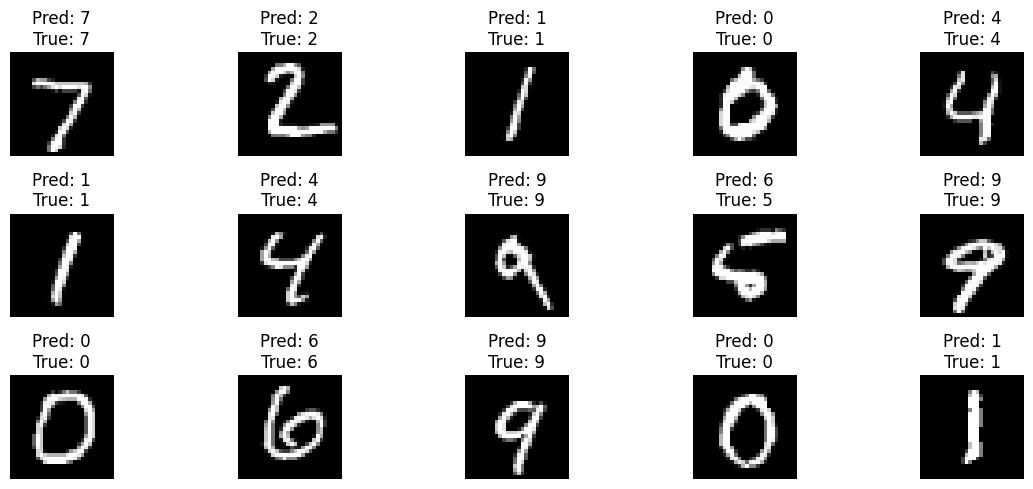

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a model (choose one)
model = cnn_model  # or model

# Predict on test set
predictions = model.predict(x_test)

# Convert predictions to label indices (0–9)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test  # Use y_test directly as it contains the true labels

# Plot the first 15 test images with predicted vs true labels
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    if x_test.shape[-1] == 1:
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    else:
        plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()